## Analysis of Robinhood Portfolio (robin_$tocks)

Project by: Pete Aguirre II

In this project, I will do a retuern:risk analysis on my current Robinhood stock portfolio with the help of multiple 
tools using:
- Python 3
- Jupyter Lab/Notebook
- Beautiful Soup
- Markowitz Efficent Frontier

## TO DO LIST:
- Create a daily, weekly, quarterly, yearly portfolio performance
- Learn how to create beatiful graphs
- Create interactive dashboards 
- Learn Monte Carlo Simulations

In [1]:
# Installing libraries 
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install robin_stocks

# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import robin_stocks as r 
import pyotp

from pandas_datareader import data as wb

# Magic
%matplotlib inline

## 1.) Data Collection (updated)
Notes: Log in with Robinhood and portfolio will be gathered automatically

In [ ]:
# Robinhood Log In 
email = input("Enter email: ")
password = input("Enter password: ")

totp = pyotp.TOTP("My2factorAppHere").now()
log_in = r.login(email, password, expiresIn=500, by_sms=True, mfa_code=totp)

# Get stocks value
stonks = r.build_holdings()

# Logout 
r.logout()

In [4]:
# Company tickers
# Since the company tickers are the keys, and the other variables are values, 
# create a dataframe for symbols first.
symbols_df = []
for k in  stonks.keys():
    symbols_df.append(k)
symbols_df = np.array(symbols_df)
symbols_df = pd.DataFrame(symbols_df, columns=['Symbol'])
symbols_df

,Symbol
0,AMZN
1,AAPL
2,TSLA
3,BABA
4,JD
5,SPHD


In [5]:
# Other headers 
# Create a dataframe for the other headers (which are values to the symbol keys).
# Drop some variables: percent_change, equity_change, type, and id 
# Rename the variables to something nicer looking
variables_df = pd.DataFrame.from_dict(stonks.values())
variables_df = variables_df.drop(['percent_change', 'equity_change', 'id', 'percentage'], axis=1)
variables_df = variables_df.rename(columns={'price':'Price', 'quantity':'Quantity', 'average_buy_price':'Average Price', 'equity':'Equity', 'name':'Name', 'pe_ratio':'P/E', 'type':'Type'})
variables_df

,Average Price,Equity,Name,P/E,Price,Quantity,Type
0,3281.1821,3368.61,Amazon,122.326000,3290.450000,1.02375300,stock
1,426.6150,4678.81,Apple,34.842500,467.881100,10.00000000,stock
2,1755.0300,3768.60,Tesla,955.316000,1884.300000,2.00000000,stock
3,246.0856,2590.62,Alibaba,31.508700,259.062500,10.00000000,adr
4,63.0859,289.26,JD.com,32.127800,72.313800,4.00000000,adr
5,34.7774,1169.64,PowerShares S&P 500 High Dividend Low Volatili...,16.079538,34.497100,33.90557000,etp


## 2.) Data Cleaning

In [6]:
# Concatinate both DataFrames 
my_portfolio = pd.concat([symbols_df, variables_df], axis=1)
my_portfolio

,Symbol,Average Price,Equity,Name,P/E,Price,Quantity,Type
0,AMZN,3281.1821,3368.61,Amazon,122.326000,3290.450000,1.02375300,stock
1,AAPL,426.6150,4678.81,Apple,34.842500,467.881100,10.00000000,stock
2,TSLA,1755.0300,3768.60,Tesla,955.316000,1884.300000,2.00000000,stock
3,BABA,246.0856,2590.62,Alibaba,31.508700,259.062500,10.00000000,adr
4,JD,63.0859,289.26,JD.com,32.127800,72.313800,4.00000000,adr
5,SPHD,34.7774,1169.64,PowerShares S&P 500 High Dividend Low Volatili...,16.079538,34.497100,33.90557000,etp


In [7]:
# Check variable types
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
Symbol           6 non-null object
Average Price    6 non-null object
Equity           6 non-null object
Name             6 non-null object
P/E              6 non-null object
Price            6 non-null object
Quantity         6 non-null object
Type             6 non-null object
dtypes: object(8)
memory usage: 464.0+ bytes


In [8]:
# Change some values to floats and round them to 2 decimal numbers
my_portfolio['Price'] = my_portfolio['Price'].astype(float)
my_portfolio['Quantity'] = my_portfolio['Quantity'].astype(float).astype(int)
my_portfolio['Average Price'] = round(my_portfolio['Average Price'].astype(float), 2)
my_portfolio['Equity'] = round(my_portfolio['Equity'].astype(float), 2)
my_portfolio['P/E'] = round(my_portfolio['P/E'].astype(float),2)
my_portfolio

,Symbol,Average Price,Equity,Name,P/E,Price,Quantity,Type
0,AMZN,3281.18,3368.61,Amazon,122.33,3290.4500,1,stock
1,AAPL,426.62,4678.81,Apple,34.84,467.8811,10,stock
2,TSLA,1755.03,3768.60,Tesla,955.32,1884.3000,2,stock
3,BABA,246.09,2590.62,Alibaba,31.51,259.0625,10,adr
4,JD,63.09,289.26,JD.com,32.13,72.3138,4,adr
5,SPHD,34.78,1169.64,PowerShares S&P 500 High Dividend Low Volatili...,16.08,34.4971,33,etp


In [9]:
# Check once more
# Note: at this point, numbers should be floats
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
Symbol           6 non-null object
Average Price    6 non-null float64
Equity           6 non-null float64
Name             6 non-null object
P/E              6 non-null float64
Price            6 non-null float64
Quantity         6 non-null int32
Type             6 non-null object
dtypes: float64(4), int32(1), object(3)
memory usage: 440.0+ bytes


In [10]:
my_portfolio = my_portfolio[["Name","Symbol","Type","Price","Quantity","Average Price","Equity","P/E"]]
# my_portfolio

In [11]:
# Convert any '.' to '-' in symbols
my_portfolio['Symbol'] = my_portfolio['Symbol'].str.replace(".", "-")

In [12]:
# Confirm that '.' has been replaced by '-' on symbol
my_portfolio

,Name,Symbol,Type,Price,Quantity,Average Price,Equity,P/E
0,Amazon,AMZN,stock,3290.4500,1,3281.18,3368.61,122.33
1,Apple,AAPL,stock,467.8811,10,426.62,4678.81,34.84
2,Tesla,TSLA,stock,1884.3000,2,1755.03,3768.60,955.32
3,Alibaba,BABA,adr,259.0625,10,246.09,2590.62,31.51
4,JD.com,JD,adr,72.3138,4,63.09,289.26,32.13
5,PowerShares S&P 500 High Dividend Low Volatili...,SPHD,etp,34.4971,33,34.78,1169.64,16.08


In [13]:
# Create weights for each company
# capital = sigma(quantity * average price)
# weights = (quantity * average price)/capital

capital = np.sum(my_portfolio['Quantity']*my_portfolio['Average Price'])
weights = []

for w in range(len(my_portfolio)):
    weights.append(round(((my_portfolio['Quantity'][w] * my_portfolio['Average Price'][w])/capital), 2))

weights_df = np.array(weights)
weights_df = pd.DataFrame({'Weights':weights})

np.sum(weights_df)



Weights    1.01
dtype: float64

In [14]:
# Ensure that these are the only variables included
my_portfolio = pd.concat([my_portfolio, weights_df], axis=1)
my_portfolio.to_excel("portfolio.xlsx")
my_portfolio

,Name,Symbol,Type,Price,Quantity,Average Price,Equity,P/E,Weights
0,Amazon,AMZN,stock,3290.4500,1,3281.18,3368.61,122.33,0.22
1,Apple,AAPL,stock,467.8811,10,426.62,4678.81,34.84,0.29
2,Tesla,TSLA,stock,1884.3000,2,1755.03,3768.60,955.32,0.24
3,Alibaba,BABA,adr,259.0625,10,246.09,2590.62,31.51,0.16
4,JD.com,JD,adr,72.3138,4,63.09,289.26,32.13,0.02
5,PowerShares S&P 500 High Dividend Low Volatili...,SPHD,etp,34.4971,33,34.78,1169.64,16.08,0.08


## 3.) Data Collection of Historical Prices

In [15]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = my_portfolio['Symbol']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [16]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1490 entries, 2014-09-19 to 2020-08-19
Data columns (total 6 columns):
AMZN    1490 non-null float64
AAPL    1490 non-null float64
TSLA    1490 non-null float64
BABA    1490 non-null float64
JD      1490 non-null float64
SPHD    1490 non-null float64
dtypes: float64(6)
memory usage: 81.5 KB


In [17]:
np.array([tickers])

array([['AMZN', 'AAPL', 'TSLA', 'BABA', 'JD', 'SPHD']], dtype=object)

In [18]:
historical_data.head()

,AMZN,AAPL,TSLA,BABA,JD,SPHD
Date,,,,,,
2014-09-19,331.320007,91.730469,259.320007,93.889999,28.350000,24.605312
2014-09-22,324.500000,91.821304,250.029999,89.889999,26.969999,24.534039
2014-09-23,323.630005,93.256874,250.410004,87.169998,26.570000,24.383572
2014-09-24,328.209991,92.448242,252.139999,90.570000,27.180000,24.486519
2014-09-25,321.929993,88.922958,246.949997,88.919998,26.570000,24.296457


In [19]:
historical_data.tail()

,AMZN,AAPL,TSLA,BABA,JD,SPHD
Date,,,,,,
2020-08-13,3161.020020,460.040009,1621.000000,253.720001,62.540001,34.639999
2020-08-14,3148.020020,459.630005,1650.709961,253.970001,62.060001,34.759998
2020-08-17,3182.409912,458.429993,1835.640015,256.959991,66.980003,34.610001
2020-08-18,3312.489990,462.250000,1887.089966,259.200012,70.320000,34.389999
2020-08-19,3290.449951,467.769989,1883.129028,259.062500,72.309998,34.490002


In [20]:
historical_data.to_excel("portfolio_adj_close_historical.xlsx")

In [21]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1490 entries, 2014-09-19 to 2020-08-19
Data columns (total 6 columns):
AMZN    1489 non-null float64
AAPL    1489 non-null float64
TSLA    1489 non-null float64
BABA    1489 non-null float64
JD      1489 non-null float64
SPHD    1489 non-null float64
dtypes: float64(6)
memory usage: 81.5 KB


In [22]:
returns.head()

,AMZN,AAPL,TSLA,BABA,JD,SPHD
Date,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,-0.020799,0.000990,-0.036482,-0.043537,-0.049902,-0.002901
2014-09-23,-0.002685,0.015513,0.001519,-0.030726,-0.014942,-0.006152
2014-09-24,0.014053,-0.008709,0.006885,0.038263,0.022699,0.004213
2014-09-25,-0.019320,-0.038879,-0.020799,-0.018386,-0.022699,-0.007792


In [23]:
returns.tail()

,AMZN,AAPL,TSLA,BABA,JD,SPHD
Date,,,,,,
2020-08-13,-0.000386,0.017543,0.041722,-0.005777,-0.005740,-0.011481
2020-08-14,-0.004121,-0.000892,0.018162,0.000985,-0.007705,0.003458
2020-08-17,0.010865,-0.002614,0.106188,0.011704,0.076292,-0.004325
2020-08-18,0.040061,0.008298,0.027643,0.008680,0.048662,-0.006377
2020-08-19,-0.006676,0.011871,-0.002101,-0.000531,0.027906,0.002904


In [24]:
returns.to_excel("portfolio_roi.xlsx")

## 4.) Data Analysis

In [25]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([30.25, 28.44, 52.41, 32.57, 41.42, 18.98])

In [26]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AMZN,0.15,1.91,38.54,30.25
1,AAPL,0.11,1.80,27.35,28.44
2,TSLA,0.13,3.31,33.29,52.41
3,BABA,0.07,2.06,17.04,32.57
4,JD,0.06,2.62,15.72,41.42
5,SPHD,0.02,1.20,5.67,18.98


In [27]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AMZN   2014-10-24
AAPL   2020-03-16
TSLA   2020-03-16
BABA   2015-01-29
JD     2020-03-16
SPHD   2020-03-16
dtype: datetime64[ns]

In [28]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AMZN   2015-04-24
AAPL   2020-03-13
TSLA   2020-02-03
BABA   2017-06-08
JD     2019-08-13
SPHD   2020-03-24
dtype: datetime64[ns]

In [29]:
# Calculate Weighted Returns 
weights = np.array([my_portfolio['Weights']])
weighted_returns = ( weights * returns)

In [30]:
weighted_returns.head()

,AMZN,AAPL,TSLA,BABA,JD,SPHD
Date,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,-0.004576,0.000287,-0.008756,-0.006966,-0.000998,-0.000232
2014-09-23,-0.000591,0.004499,0.000364,-0.004916,-0.000299,-0.000492
2014-09-24,0.003092,-0.002526,0.001652,0.006122,0.000454,0.000337
2014-09-25,-0.004250,-0.011275,-0.004992,-0.002942,-0.000454,-0.000623


In [31]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AMZN,AAPL,TSLA,BABA,JD,SPHD
AMZN,0.000366,0.000184,0.000230,0.000189,0.000225,0.000079
AAPL,0.000184,0.000324,0.000222,0.000173,0.000212,0.000121
TSLA,0.000230,0.000222,0.001099,0.000223,0.000297,0.000136
BABA,0.000189,0.000173,0.000223,0.000424,0.000337,0.000086
JD,0.000225,0.000212,0.000297,0.000337,0.000686,0.000104
SPHD,0.000079,0.000121,0.000136,0.000086,0.000104,0.000144


In [32]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()*250
return_cov

,AMZN,AAPL,TSLA,BABA,JD,SPHD
AMZN,0.091483,0.045937,0.057513,0.047281,0.056214,0.019801
AAPL,0.045937,0.080877,0.055463,0.043192,0.052997,0.030185
TSLA,0.057513,0.055463,0.274638,0.055728,0.074172,0.034123
BABA,0.047281,0.043192,0.055728,0.106063,0.084371,0.021616
JD,0.056214,0.052997,0.074172,0.084371,0.171551,0.026069
SPHD,0.019801,0.030185,0.034123,0.021616,0.026069,0.036023


In [33]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AMZN,AAPL,TSLA,BABA,JD,SPHD
AMZN,1.000000,0.534049,0.362838,0.479997,0.448724,0.344923
AAPL,0.534049,1.000000,0.372146,0.466352,0.449924,0.559224
TSLA,0.362838,0.372146,1.000000,0.326523,0.341715,0.343064
BABA,0.479997,0.466352,0.326523,1.000000,0.625485,0.349698
JD,0.448724,0.449924,0.341715,0.625485,1.000000,0.331613
SPHD,0.344923,0.559224,0.343064,0.349698,0.331613,1.000000


In [53]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio Return
portfolio_return = weighted_returns.sum(axis=1)
print("Portfolio Return (10 days)", portfolio_return.mean()*10)
print("Portfolio Return (252 days)", portfolio_return.mean()*252)
print("Portfolio Return (756 days)", portfolio_return.mean()*756)

print("")

# Portfolio variance
pflio_var = np.sqrt(np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*10, my_portfolio['Weights'])))
print("Portfolio Volatility (10 days)", pflio_var)
pflio_var = np.sqrt(np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*252, my_portfolio['Weights'])))
print("Portfolio Volatility (252 days)", pflio_var)
pflio_var = np.sqrt(np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*756, my_portfolio['Weights'])))
print("Portfolio Volatility (756 days)", pflio_var)

# print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

#pflio_vol2 = np.sqrt(pflio_var)
#print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(my_portfolio)):
    if i==0:
        div_risk = pflio_var - my_portfolio['Weights'][0]**2*variances['Variance'][0]
    else:
        div_risk -= my_portfolio['Weights'][i]**2*variances['Variance'][i]
print("Diversifiable Risk:", round(div_risk,2)*100, "%")

#print("")
# Non Diversifiable Risk
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)
# print("Non-Diversifiable Risk:", non_div_risk1)

#print("")
non_div_risk2 = 0
for i in range(len(my_portfolio)):
    non_div_risk2 += my_portfolio['Weights'][i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)*100
print("Non-Diversifiable Risk:", non_div_risk2, "%")
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Return (10 days) 0.011150760860138512
Portfolio Return (252 days) 0.2809991736754905
Portfolio Return (756 days) 0.8429975210264715

Portfolio Volatility (10 days) 0.052054348827244114
Portfolio Volatility (252 days) 0.26131075722609653
Portfolio Volatility (756 days) 0.45260350807989536

Diversifiable Risk: 42.0 %

Non-Diversifiable Risk: 3.01 %
Non-Diversifiable Risk: False


In [35]:
no_assets = len(tickers)
no_assets

6

In [36]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(10000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

1.0000000000000002


In [37]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
#pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)

In [38]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
0,0.218378,0.219478
1,0.241669,0.256876
2,0.214559,0.261229
3,0.198854,0.258533
4,0.201112,0.247922


In [39]:
pflio_scenarios.tail(10)

,Return,Volatility
9990,0.176547,0.253723
9991,0.202610,0.254209
9992,0.195784,0.242765
9993,0.244046,0.229016
9994,0.215559,0.301260
9995,0.237301,0.259101
9996,0.209188,0.248220
9997,0.238016,0.264657
9998,0.293486,0.317298
9999,0.248542,0.279369


In [47]:
for i in range(10000):
    if pflio_scenarios['Return'][i] >= 0.31 and pflio_scenarios['Volatility'][i] < 0.26:
        print(pflio_scenarios.iloc[i])

Return        0.316462
Volatility    0.250948
Name: 935, dtype: float64
Return        0.313146
Volatility    0.257787
Name: 5394, dtype: float64
Return        0.313218
Volatility    0.253257
Name: 6728, dtype: float64


In [50]:
# For Testing purposes
index = 5394
#index = len(pflio_scenarios)-1
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
print(index)
print(np.sum(pflio_wei[index]))
pflio_wei2 = pflio_wei[index]



ideal_portfolio = pd.DataFrame({'Original Weights':my_portfolio['Weights'], 'Ideal Weights': pflio_wei2})
ideal_portfolio = pd.concat([symbols_df, ideal_portfolio], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Ideal Weights', ascending=False)
ideal_portfolio.to_csv('ideal_weights.csv', index=False)
ideal_portfolio

5394
0.9999999999999998


,Symbol,Original Weights,Ideal Weights
0,AMZN,0.22,0.394006
1,AAPL,0.29,0.338139
2,TSLA,0.24,0.167717
4,JD,0.02,0.049777
5,SPHD,0.08,0.030321
3,BABA,0.16,0.020040


Text(0, 0.5, 'Expected Return')

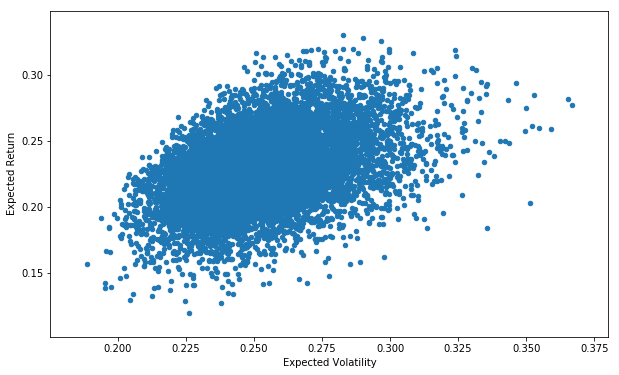

In [41]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

## Best Results so far:
- 30% Return, 25% Volatility: 
    - AMZN - 0.425584
    - AAPL - 0.382721
    - TSLA - 0.098763
    - SPHD - 0.045753
    - JD - 0.035752
    - BABA - 0.011428
    
    
- 31% Return, 25% Volatility:
    - AMZN - 0.727883
    - SPHD - 0.169791
    - JD - 0.033700
    - BABA - 0.030990
    - TSLA - 0.021079
    - AAPL - 0.016557


## Data Visualization

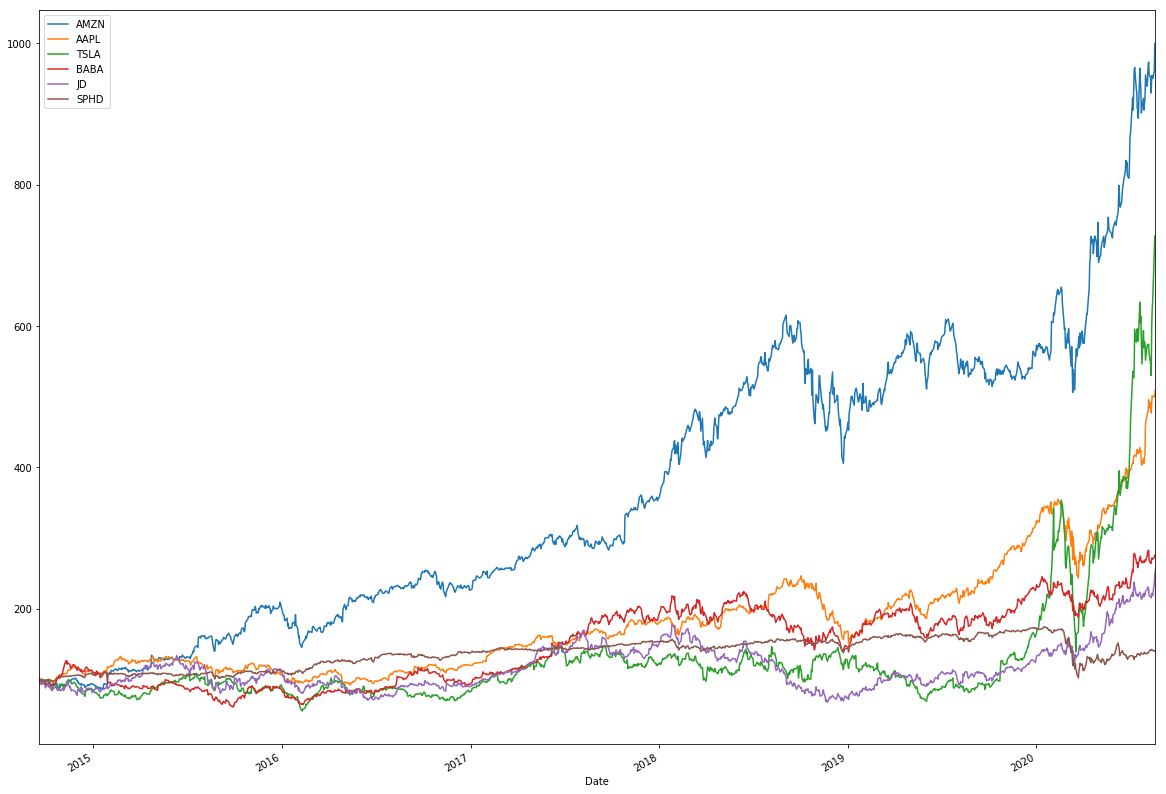

In [43]:
(historical_data/historical_data.iloc[0]*100).plot(figsize=(20,15))

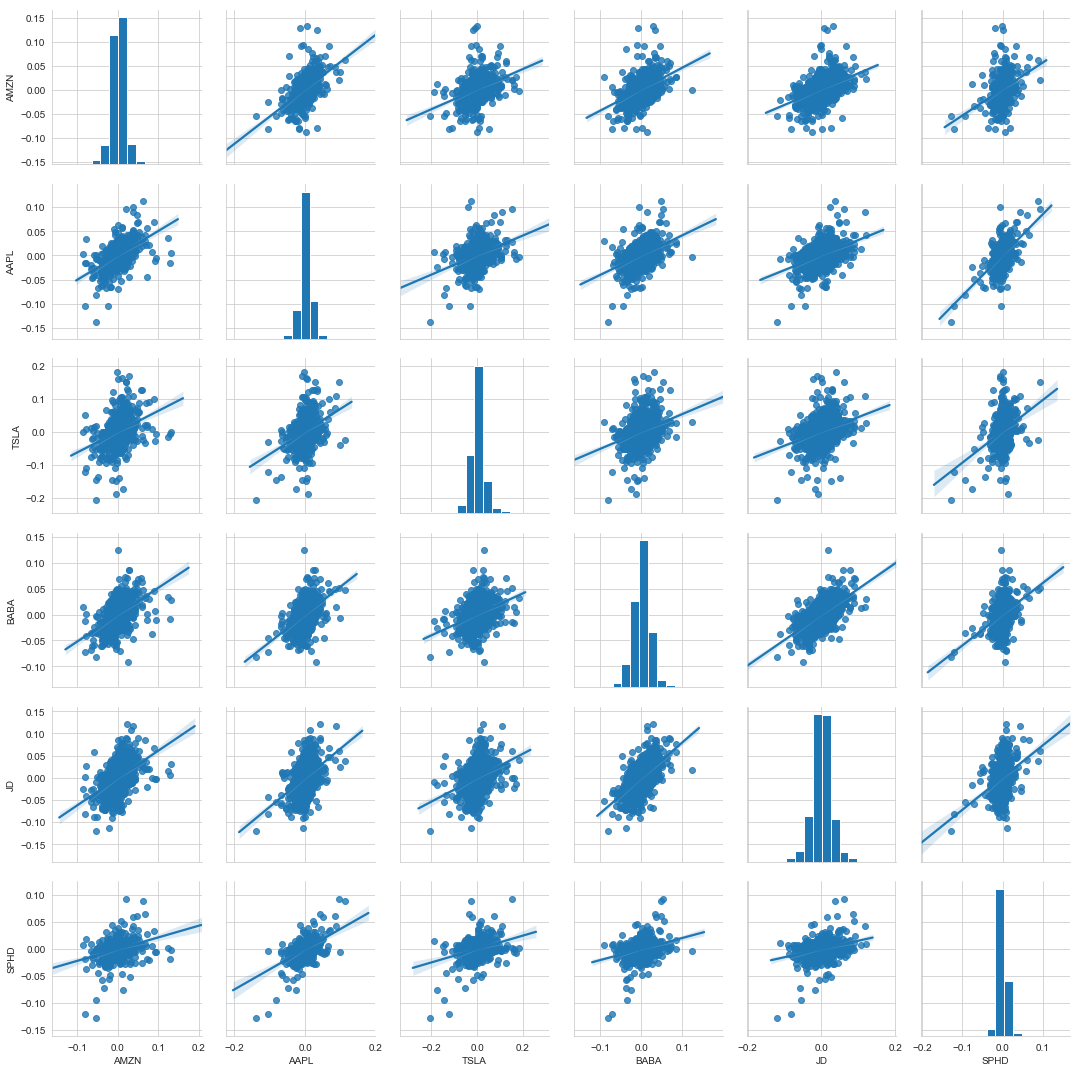

In [44]:
sns.set_style('whitegrid')
regression = sns.pairplot(returns[1:], kind="reg")
regression

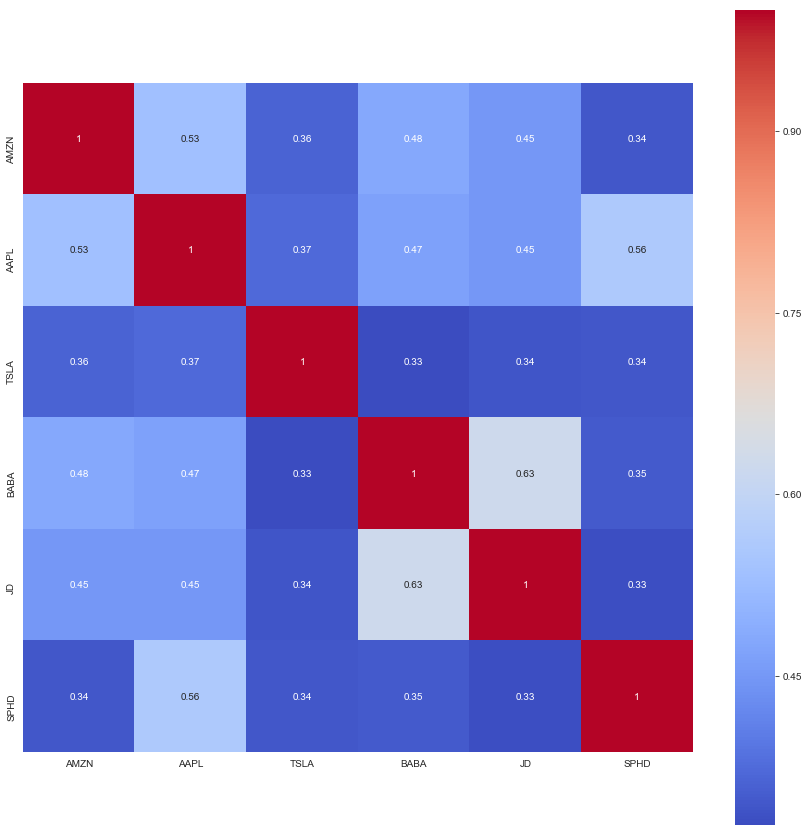

In [45]:
# Excatly -1: Perfect negative relationship 
# -0.70:      Strong negative relationship
# -0.50:      Moderate negative relationship
# -0.30:      Weak negative relationship
#  0.00:      No correlation
# +0.30:      Weak positive relationship
# +0.50:      Moderate positive relationship
# +0.70:      Strong positive relationship
# Exactly +1: Perfect positive relationship

plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap
